In [1]:
import sys
import keras
import pandas as pd
# import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
# print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.0-arm64-arm-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.10.8 (main, Oct 13 2022, 09:48:40) [Clang 14.0.0 (clang-1400.0.29.102)]
Pandas 1.5.1
SciPy 1.9.3
GPU is available


In [2]:
# Reference
# https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763

# load MNIST dataset
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

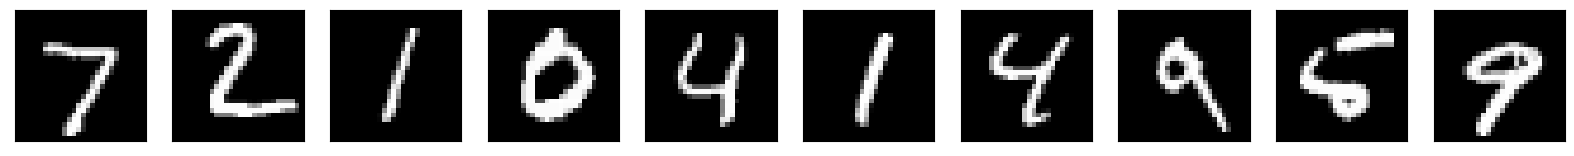

In [3]:
# show dataset images
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# total 60000
# The encoding process
input_img = Input(shape=(28, 28, 1))  

# Encoding 
# Conv1 
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

Metal device set to: Apple M1 Pro


2022-11-22 17:41:29.379802: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 17:41:29.379901: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# The decoding process
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


autoencoder
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [10]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# total 60000
# The encoding process
input_img = Input(shape=(28, 28, 1))  

# encoding 
x = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# The decoding process
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


autoencoder

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 7, 7, 16)          2320

In [6]:
import numpy as np
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [9]:
!tensorboard --logdir=/tmp/autoencoder

2022-11-18 20:53:10.573754: F tensorflow/c/experimental/stream_executor/stream_executor.cc:808] Non-OK-status: stream_executor::MultiPlatformManager::RegisterPlatform( std::move(cplatform)) status: INTERNAL: platform is already registered with name: "METAL"


In [7]:
import keras
import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
# model.fit(train_images, 
#           train_labels,  
#           epochs=10,
#           validation_data=(test_images, test_labels),
#           callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

# train autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[cp_callback]
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
               )

Epoch 1/100


2022-11-22 17:51:49.847278: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 17:51:50.209346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.1744 - accuracy: 0.8028

2022-11-22 17:52:05.256170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: saving model to training_1/cp.ckpt
469/469 [==============================] - 17s 31ms/step - loss: 0.1744 - accuracy: 0.8028 - val_loss: 0.1162 - val_accuracy: 0.8088
Epoch 2/100
468/469 [============================>.] - ETA: 0s - loss: 0.1094 - accuracy: 0.8107
Epoch 2: saving model to training_1/cp.ckpt
469/469 [==============================] - 15s 31ms/step - loss: 0.1094 - accuracy: 0.8107 - val_loss: 0.1025 - val_accuracy: 0.8109
Epoch 3/100
467/469 [============================>.] - ETA: 0s - loss: 0.1008 - accuracy: 0.8122
Epoch 3: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 30ms/step - loss: 0.1008 - accuracy: 0.8122 - val_loss: 0.0971 - val_accuracy: 0.8118
Epoch 4/100
469/469 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.8128
Epoch 4: saving model to training_1/cp.ckpt
469/469 [==============================] - 15s 31ms/step - loss: 0.0965 - accuracy: 0.8128 - val_loss: 0.0937 - val_accuracy: 0.8124


468/469 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.8148
Epoch 31: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 30ms/step - loss: 0.0790 - accuracy: 0.8148 - val_loss: 0.0784 - val_accuracy: 0.8138
Epoch 32/100
468/469 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.8149
Epoch 32: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 29ms/step - loss: 0.0788 - accuracy: 0.8148 - val_loss: 0.0786 - val_accuracy: 0.8140
Epoch 33/100
468/469 [============================>.] - ETA: 0s - loss: 0.0787 - accuracy: 0.8149
Epoch 33: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 29ms/step - loss: 0.0787 - accuracy: 0.8149 - val_loss: 0.0778 - val_accuracy: 0.8140
Epoch 34/100
468/469 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.8149
Epoch 34: saving model to training_1/cp.ckpt
469/469 [==============================] -

Epoch 61/100
469/469 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.8151
Epoch 61: saving model to training_1/cp.ckpt
469/469 [==============================] - 13s 28ms/step - loss: 0.0760 - accuracy: 0.8151 - val_loss: 0.0752 - val_accuracy: 0.8141
Epoch 62/100
468/469 [============================>.] - ETA: 0s - loss: 0.0761 - accuracy: 0.8150
Epoch 62: saving model to training_1/cp.ckpt
469/469 [==============================] - 13s 28ms/step - loss: 0.0761 - accuracy: 0.8151 - val_loss: 0.0753 - val_accuracy: 0.8140
Epoch 63/100
468/469 [============================>.] - ETA: 0s - loss: 0.0760 - accuracy: 0.8151
Epoch 63: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 29ms/step - loss: 0.0760 - accuracy: 0.8151 - val_loss: 0.0753 - val_accuracy: 0.8140
Epoch 64/100
469/469 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.8151
Epoch 64: saving model to training_1/cp.ckpt
469/469 [====================

Epoch 91/100
468/469 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.8151
Epoch 91: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 31ms/step - loss: 0.0746 - accuracy: 0.8151 - val_loss: 0.0739 - val_accuracy: 0.8142
Epoch 92/100
468/469 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.8151
Epoch 92: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 30ms/step - loss: 0.0746 - accuracy: 0.8151 - val_loss: 0.0747 - val_accuracy: 0.8142
Epoch 93/100
468/469 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.8152
Epoch 93: saving model to training_1/cp.ckpt
469/469 [==============================] - 14s 30ms/step - loss: 0.0746 - accuracy: 0.8151 - val_loss: 0.0738 - val_accuracy: 0.8141
Epoch 94/100
467/469 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.8152
Epoch 94: saving model to training_1/cp.ckpt
469/469 [====================

313/313 [==============================] - 2s 6ms/step


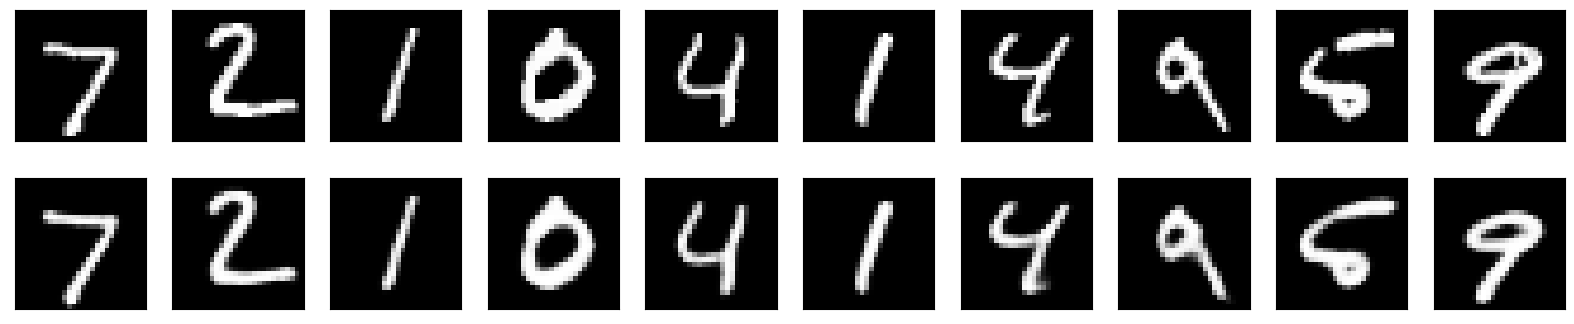

In [9]:
import matplotlib.pyplot as plt

# See trained Model prediction result
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

 18/313 [>.............................] - ETA: 1s

2022-11-18 21:03:46.044986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


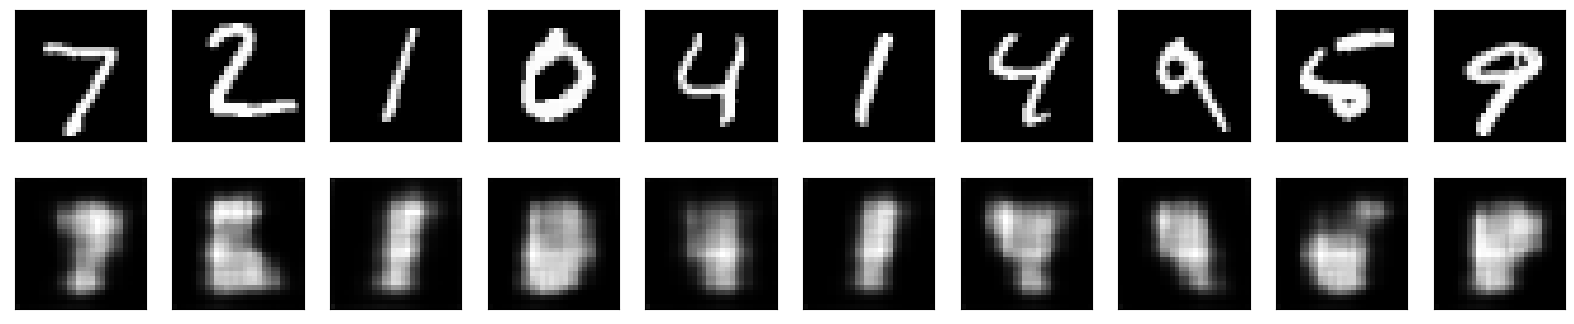

In [11]:
# See trained Model prediction result
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = x_test[1]
compressed = decoded_imgs[1]
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 71.16079853388752 dB
